# Importing libraries and Data.

In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt 

%matplotlib inline 

import warnings  
warnings.filterwarnings("ignore")

In [2]:
# Reading data

train= pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train_original=train.copy()
test_original=test.copy()

# Understanding the Data

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.shape  ,  test.shape


((614, 13), (367, 12))

# Univariate Analysis

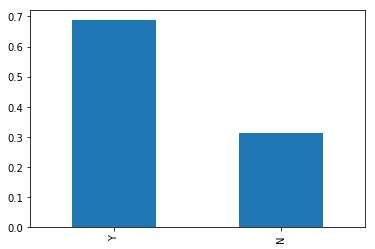

In [7]:
#Loan_Status (Target_Variable)

train["Loan_Status"].value_counts(normalize="true").plot.bar()
plt.show()

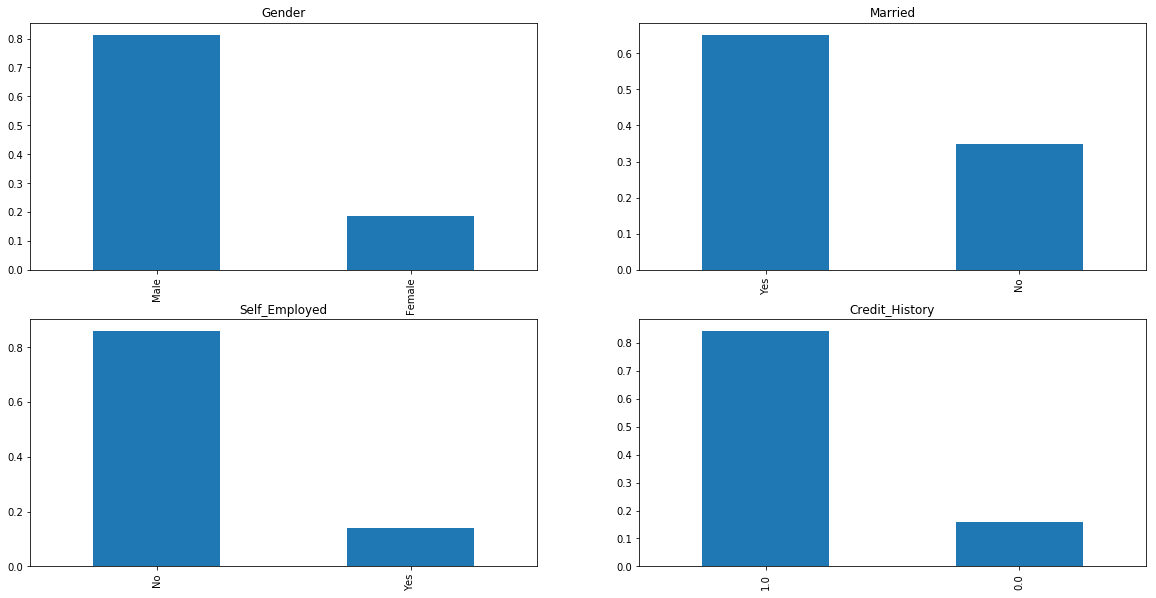

In [8]:
#Independent Variable (Categorical) 

plt.figure(1) 

plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 

plt.show()

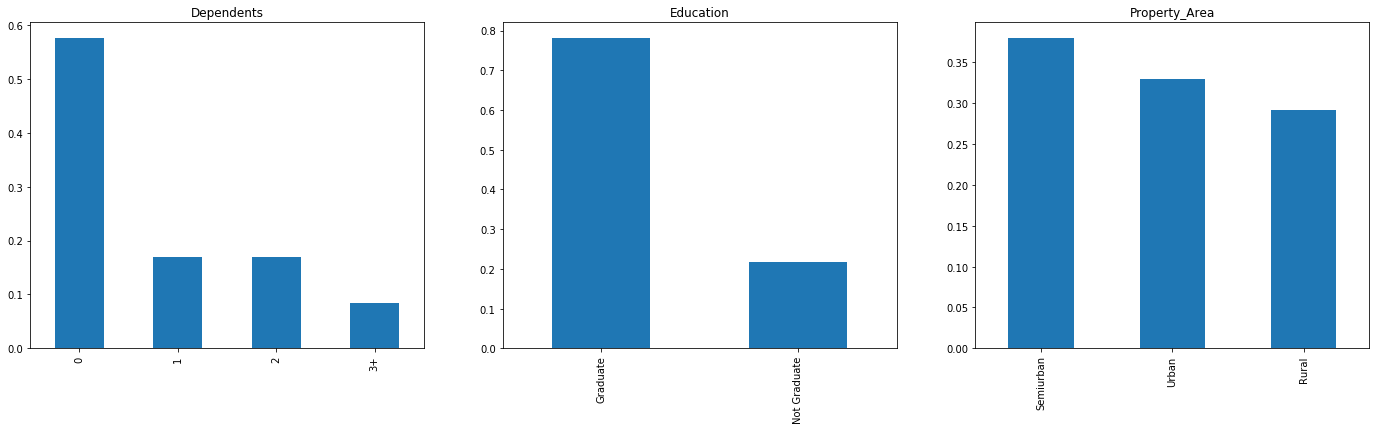

In [9]:
#Independent Variable (Ordinal)

plt.figure(1) 

plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 

plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 

plt.show()

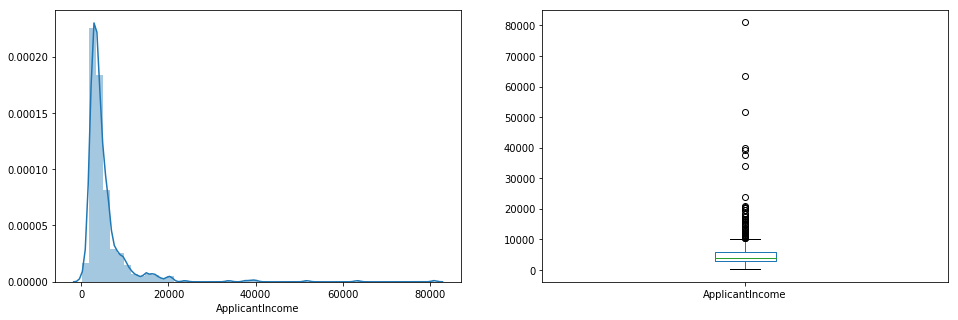

In [10]:
#Numerical_Variable (ApplicantIncome)

plt.figure(1)

plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

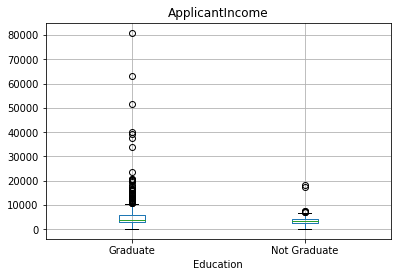

In [11]:
#ApplicantIncome_by_Education

train.boxplot(column='ApplicantIncome', by = 'Education'),
p=plt.suptitle("")

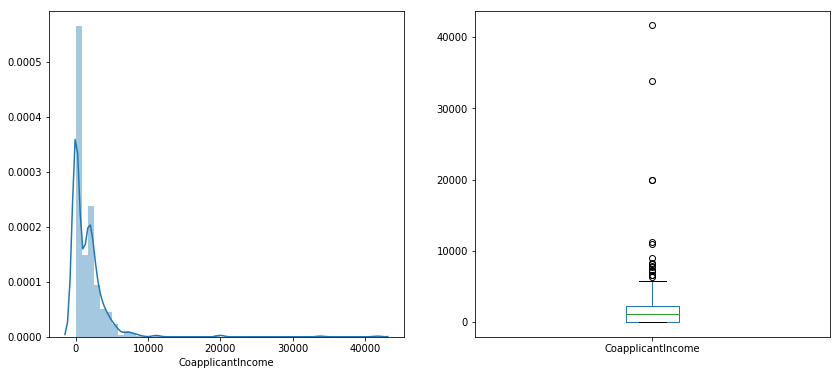

In [12]:
#Numerical_Variable (CoapplicantIncome)

plt.figure(1)

plt.subplot(121)
sns.distplot(train["CoapplicantIncome"])

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(14,6))

plt.show()

In [13]:
train['CoapplicantIncome'].quantile([0,0.25,0.50,0.75,1])

0.00        0.00
0.25        0.00
0.50     1188.50
0.75     2297.25
1.00    41667.00
Name: CoapplicantIncome, dtype: float64

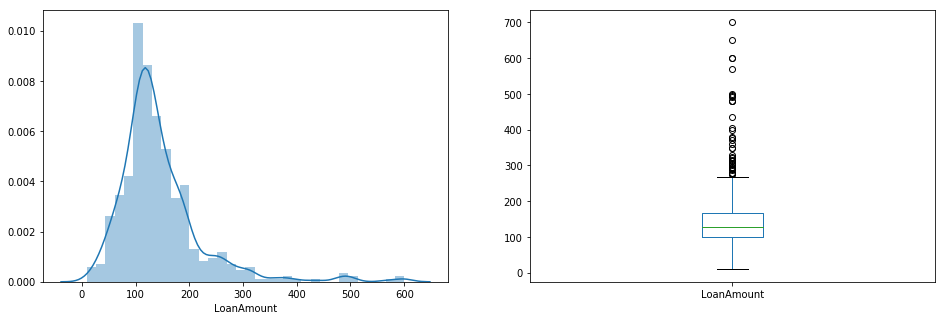

In [14]:
#Numerical_Variable (LoanAmount)

plt.figure(1)

plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']); 

plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 

plt.show()

# Bivariate Analysis

In [15]:
# Gender vs Loan_status

Gender = pd.crosstab(train['Gender'], train['Loan_Status']).apply(lambda x : x/x.sum(),axis=1 )
Gender

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


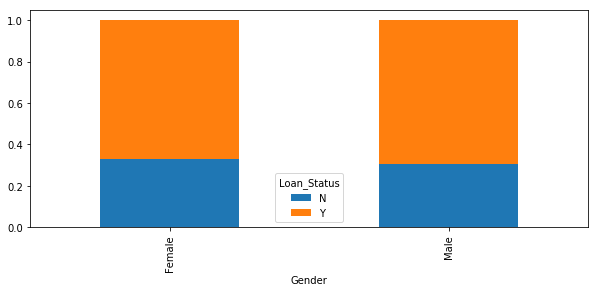

In [16]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(10,4))
plt.show()

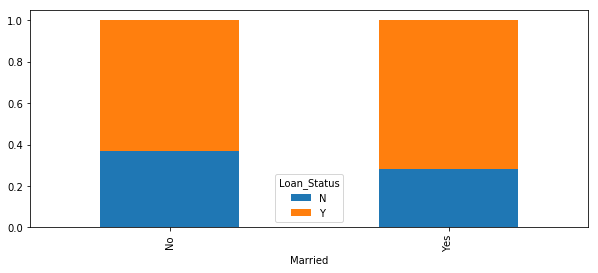

In [17]:
# Married vs Loan_Status

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="Bar",stacked=True,figsize=(10,4))
plt.show()

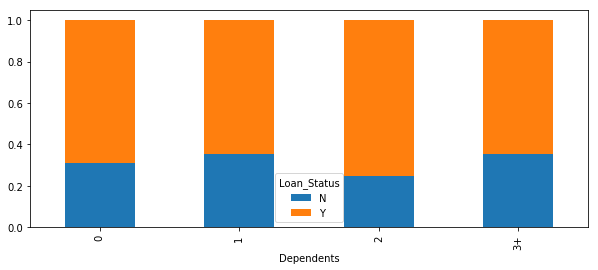

In [18]:
# Dependents vs Loan_Status

Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="Bar",stacked=True,figsize=(10,4))
plt.show()

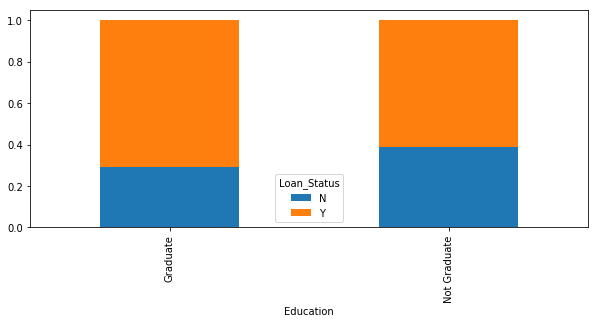

In [19]:
# Education vs Loan_Status

Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="Bar",stacked=True,figsize=(10,4))
plt.show()

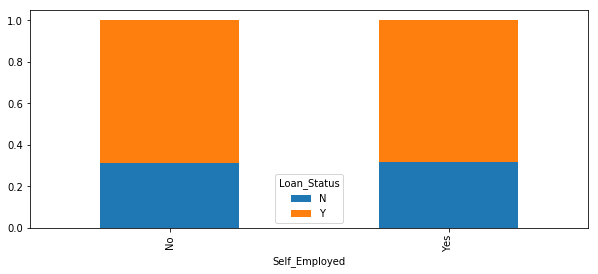

In [20]:
# Self_Employed vs Loan_Status

Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="Bar",stacked=True,figsize=(10,4))
plt.show()

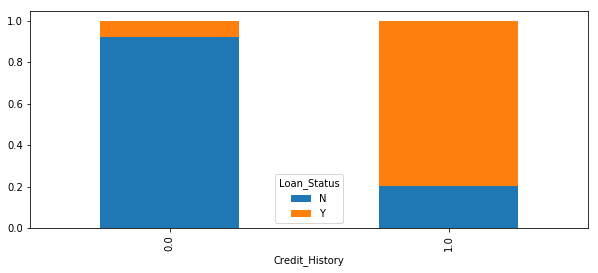

In [21]:
# Credit_History vs Loan_Status

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4))
plt.show() 

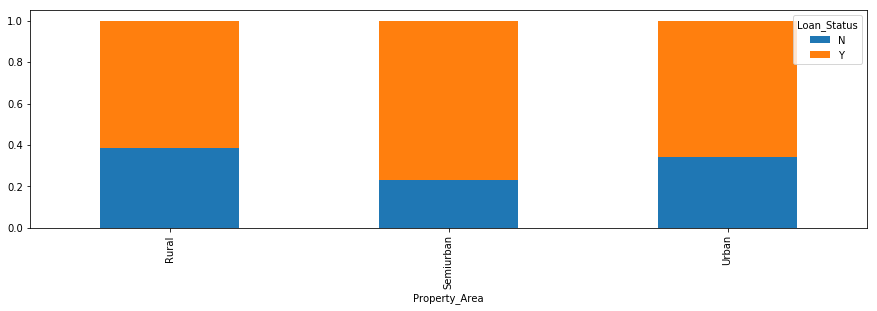

In [22]:
#Property_Area vs Loan_Status

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.show()

In [23]:
# ApplicantIncome vs Loan_Status

train.groupby('Loan_Status')['ApplicantIncome'].mean()


Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

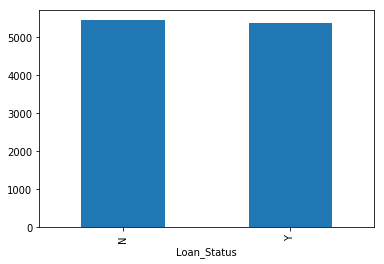

In [24]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

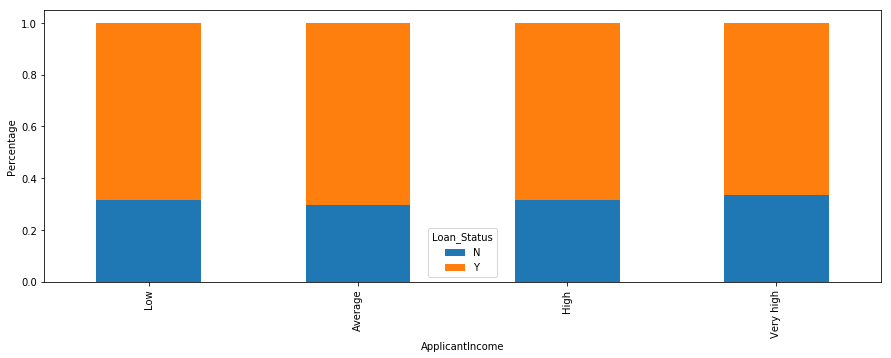

In [25]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
train['Income_bin']
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(15,5))
plt.xlabel('ApplicantIncome')
p=plt.ylabel('Percentage')
#plt.ylabel('Percentage')
#plt.show()

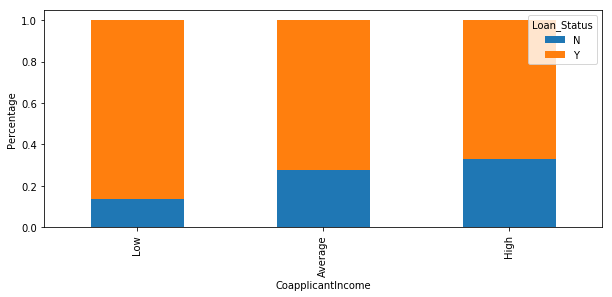

In [26]:
# CoapplicantIncome vs Loan_Status

bins=[0,1000,3000,42000]
groups=['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=groups)
Coapplicant_bin=pd.crosstab(train["CoapplicantIncome_bin"],train['Loan_Status'])
Coapplicant_bin.div(Coapplicant_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,4))
plt.xlabel('CoapplicantIncome')
#p=plt.ylabel('Percentage')
plt.ylabel('Percentage')
plt.show()

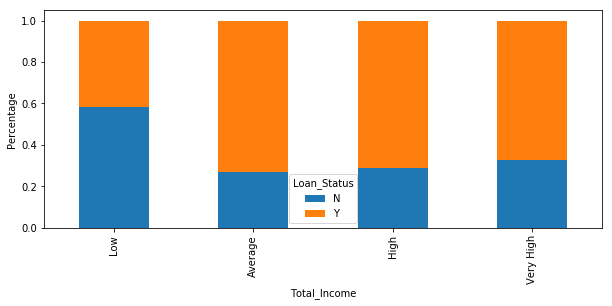

In [27]:
#Total_Income vs Loan_Status

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
groups=['Low','Average','High','Very High']
train['TotalIncome_bin']= pd.cut(train['Total_Income'],bins,labels=groups)
TotalIncome_bin= pd.crosstab(train['TotalIncome_bin'],train['Loan_Status'])
TotalIncome_bin.div(TotalIncome_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,4))
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

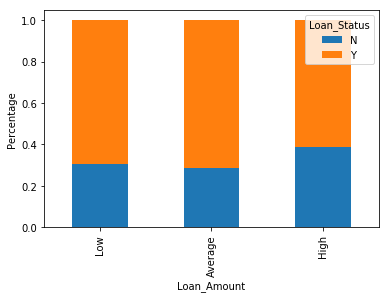

In [28]:
#LoanAmount vs Loan_Status

bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
#LoanAmount_bin.apply(lambda x : x/x.sum(),axis=1)
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Loan_Amount')
plt.ylabel('Percentage')
plt.show()

In [29]:
#Let’s drop the bins which we created for the exploration part.

train=train.drop(['Income_bin','CoapplicantIncome_bin','LoanAmount_bin','TotalIncome_bin','Total_Income'],axis=1)

In [30]:
# We will change the 3+ in dependents variable to 3 to make it a numerical variable.
# We will also convert the target variable’s categories into 0 and 1 
# so that we can find its correlation with numerical variables. 
# One more reason to do so is few models like logistic regression takes only numeric values as input. 
# We will replace N with 0 and Y with 1.

train['Dependents'].replace('3+',3, inplace=True)
test['Dependents'].replace('3+',3, inplace=True)
train['Loan_Status'].replace('N',0, inplace=True)
train['Loan_Status'].replace('Y',1, inplace=True)


In [31]:
# HEAT-MAP

# Now lets look at the correlation between all the numerical variables.
# We will use the heat map to visualize the correlation. 
# Heatmaps visualize data through variations in coloring. 
# The variables with darker color means their correlation is more.

matrix = train.corr() 
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


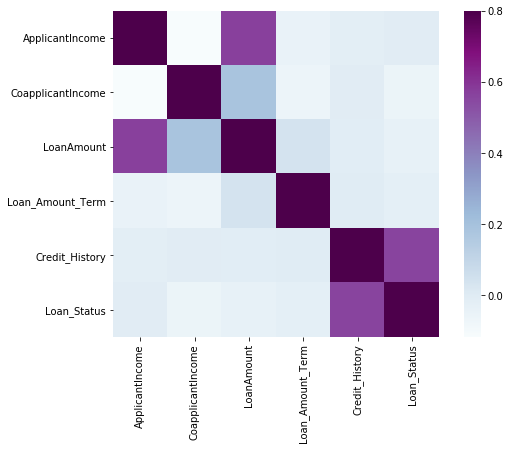

In [32]:
plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu");

# Missing Value 

In [33]:
# Let’s list out feature-wise count of missing values.

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 # Missing value treatment : categorical variables

In [34]:
# There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features
# so we can fill them using the "mode" of the features.

train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

# The mode() return 2 value, first is mode value second is count. 
# So train['Gender'].mode()[0] means get the mode value of train['Gender'].

train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

 # Missing value treatment : numerical variables

In [35]:
# Imputation in Loan_Amount_Term

train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
# It can be seen that in loan amount term variable, the value of 360 is repeating the most. 
# So we will replace the missing values in this variable using the mode of this variable.

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
# Imputation in LoanAmount

# We will use median to fill the null values as earlier we saw that loan amount have outliers
# so the "mean" will not be the proper approach as it is highly affected by the presence of outliers.

train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)



In [38]:
#  Let’s re-count feature-wise number of missing values.

train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
# Let’s fill all the missing values in the test dataset too with the same approach.

test['Gender'].fillna(test['Gender'].mode()[0], inplace=True) 
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Outlier Treatment

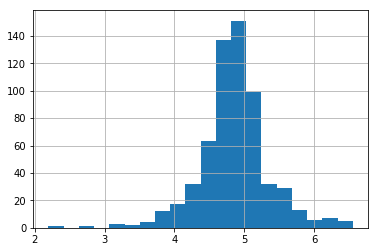

In [40]:
# Let’s visualize the effect of log transformation.
# We will do the similar changes to the test file simultaneously.

train['LoanAmount_log']=np.log(train['LoanAmount'])
test['LoanAmount_log']=np.log(test['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
plt.show()

# Logistic Regression

In [41]:
# Lets drop the Loan_ID variable as it do not have any effect on the loan status.
# We will do the same changes to the test dataset which we did for the training dataset.

train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

In [42]:
# Sklearn requires the target variable in a separate dataset. 
# So, we will drop our target variable from the train dataset and save it in another dataset.

x= train.drop('Loan_Status',axis=1)
y= train.Loan_Status

In [48]:
# Dummy Variables

x=pd.get_dummies(x) 
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [50]:
# train_test_split function from sklearn

from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size=0.3)

In [58]:
# Fit the logistic regression model.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)